In [4]:
using PyPlot

In [5]:
spin(s,i) = 2*s[i]-1

spin (generic function with 1 method)

In [6]:
function flip!(s,i)
    s[i] = 1-s[i]
end

flip! (generic function with 1 method)

In [7]:
H(s) = sum([-spin(s,i)*spin(s,i+1) for i=1:length(s)-1]) - spin(s,length(s))*spin(s,1)

H (generic function with 1 method)

In [8]:
function DH(s,i)
    E = H(s)
    flip!(s,i)
    Eflip = H(s)
    flip!(s,i)
    Eflip - E
end

DH (generic function with 1 method)

In [9]:
randomsite(n) = floor(Int,rand()*n)+1

randomsite (generic function with 1 method)

In [10]:
function mhstep!(s; beta=0.1)
    i = randomsite(length(s))
    if rand() <= exp(-beta*DH(s,i))
        flip!(s,i)
        return 1
    else
        return 0
    end
end

mhstep! (generic function with 1 method)

In [11]:
N = 1024

1024

In [12]:
nsteps=10000

10000

In [13]:
s = zeros(Int,nsteps,N);

In [14]:
a = zeros(Int,nsteps);

In [15]:
for n=2:nsteps
    copyto!(view(s,n,1:N),view(s,n-1,1:N))
    a[n] = mhstep!(view(s,n,1:N); beta=1)
end

In [16]:
function plotspins(s, a, args...; flags...)
    m,n = size(s)
    for i=1:m
        ind = findall(x->x==1,s[i,:])
        if a[i] == 1
            plot(ind,fill(i,length(ind)),"r.",args...;markersize=1,flags...)
        else
            plot(ind,fill(i,length(ind)),"b.",args...;markersize=1,flags...)
        end
    end
end

plotspins (generic function with 1 method)

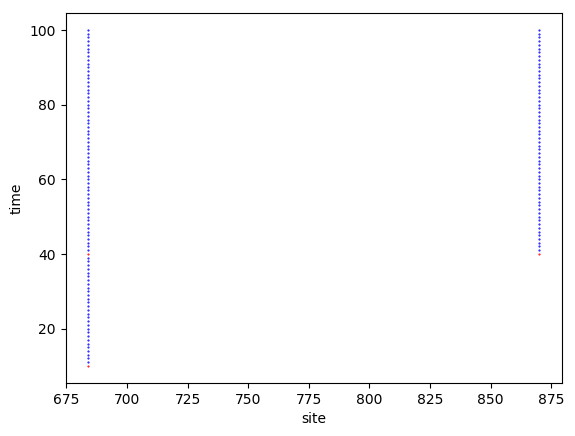

PyObject Text(24.000000000000007, 0.5, 'time')

In [17]:
plotspins(s[1:100,:],a)
xlabel("site")
ylabel("time")

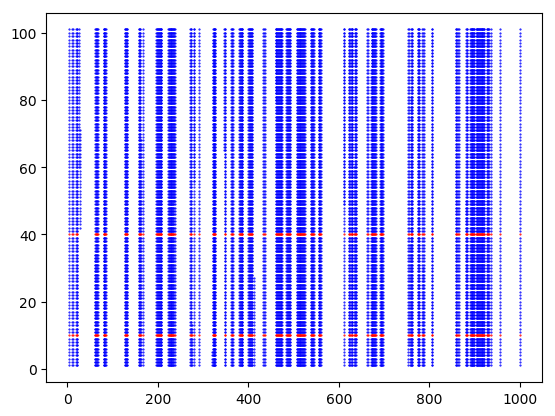

In [18]:
plotspins(s[end-100:end,:],a)

In [19]:
s[end,:]

1024-element Array{Int64,1}:
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 1
 1
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

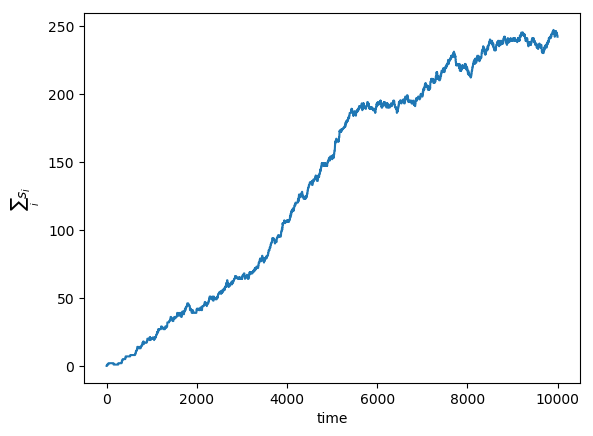

PyObject Text(0.5, 24.0, 'time')

In [20]:
plot(sum(s,dims=2))
ylabel(L"$\sum_i s_i$")
xlabel("time")

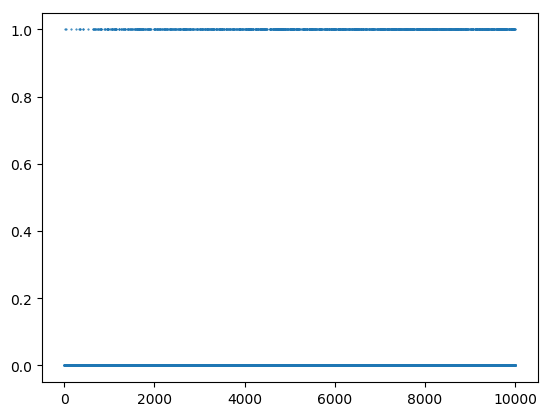

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002B18EA20>

In [21]:
plot(a,".",markersize=1)

In [22]:
sum(a)/length(a)

0.1434